In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from IPython.display import display
pd.options.display.max_columns = None

# 모든 데이터를 이용해서 Wage 예측 모델 생성

# 1. 기본 처리

In [2]:
df = pd.read_csv('./dataset/data.csv')
df

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

### 컬럼 공백값 제거

In [3]:
df = df.rename(columns={'Unnamed: 0':'Unnamed:0','Club Logo':'ClubLogo','Preferred Foot':'PreferredFoot',
                        'International Reputation':'InternationalReputation','Weak Foot':'WeakFoot',
                        'Skill Moves':'SkillMoves','Work Rate':'WorkRate','Body Type':'BodyType',
                        'Real Face':'RealFace','Jersey Number':'JerseyNumber','Loaned From':'LoanedFrom',
                        'Contract Valid Until':'ContractValidUntil','Release Clause': 'ReleaseClause'})

### 정말 쓸다리없는 컬럼 제거

In [4]:
df.drop('Unnamed:0 Photo Flag ClubLogo'.split(),axis=1,inplace=True)
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,PreferredFoot,InternationalReputation,WeakFoot,SkillMoves,WorkRate,BodyType,RealFace,Position,JerseyNumber,Joined,LoanedFrom,ContractValidUntil,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


## Value(예상 이적료) 단위 변경 및 로그변환

In [5]:
def change_value_from(Value):
    out = Value.replace('€','')
    if 'M' in out:
        out = float(out.replace('M',''))*1000000*1300/10000
    elif 'K' in out:
        out = float(out.replace('K',''))*1000*1300/10000
    return float(out)

df.Value = df.Value.apply(lambda x: change_value_from(x))
df.Value

0        14365000.0
1        10010000.0
2        15405000.0
3         9360000.0
4        13260000.0
            ...    
18202        7800.0
18203        7800.0
18204        7800.0
18205        7800.0
18206        7800.0
Name: Value, Length: 18207, dtype: float64

In [6]:
df.drop(df[df['Value']==0].index, inplace=True)

In [7]:
df['LogValue'] = np.log1p(df.Value)

## PreferredFoot, WeakFoot 값 숫자 변환

In [8]:
df.drop(df[df['PreferredFoot'].isnull()].index, inplace=True)

In [9]:
def foot(x):
    con = ''
    PreferredFoot, WeakFoot= x.PreferredFoot, x.WeakFoot
    if PreferredFoot == 'Left':
        if WeakFoot == 1:
            con = 2.5
        elif WeakFoot ==2:
            con = 3.5
        elif WeakFoot ==3:
            con = 4.5
        elif WeakFoot ==4:
            con = 5.5
        elif WeakFoot ==5:
            con = 6.5
            
    if PreferredFoot == 'Right':
        if WeakFoot == 1:
            con = 1
        elif WeakFoot ==2:
            con = 2
        elif WeakFoot ==3:
            con = 3
        elif WeakFoot ==4:
            con = 4
        elif WeakFoot ==5:
            con = 5
    return con

df['Foot'] = df.apply(foot, axis=1)

## LoanedFrom 값 숫자 변환

In [10]:
df.LoanedFrom.replace(np.nan, '0', inplace=True)
df.LoanedFrom

0        0
1        0
2        0
3        0
4        0
        ..
18202    0
18203    0
18204    0
18205    0
18206    0
Name: LoanedFrom, Length: 17907, dtype: object

In [11]:
df.LoanedFrom[df.LoanedFrom!='0']='1'

In [12]:
df['LoanedFrom'] = df['LoanedFrom'].astype(int)

## WorkRate값 숫자 변환

In [13]:
# WorkRate 9가지로 나누기.
df['WorkRate'].replace({'High/ High':1,'High/ Medium':2,
                         'Medium/ High':3,'Low/ High':4,'High/ Low':5,
                         'Medium/ Medium':6,'Low/ Medium':7,'Medium/ Low':8,'Low/ Low':9},inplace = True)
df['WorkRate'].astype(int)

0        6
1        5
2        2
3        6
4        1
        ..
18202    6
18203    6
18204    6
18205    6
18206    6
Name: WorkRate, Length: 17907, dtype: int32

## RealFace 숫자화

In [14]:
df.RealFace = df['RealFace'].replace({'Yes':1,'No':0}).astype(int)

## Height(키) 단위변환

In [15]:
def convert_height(height):
    height = str(height)
    numbers = height.split("'")
    ft = int(numbers[0])*30
    inch = int(numbers[1])*2.5
    return ft+inch

df.Height = df.Height.apply(convert_height)
df.Height

0        167.5
1        185.0
2        172.5
3        190.0
4        177.5
         ...  
18202    172.5
18203    187.5
18204    170.0
18205    175.0
18206    175.0
Name: Height, Length: 17907, dtype: float64

## Weight(몸무게) 단위변환

In [16]:
def convert_weight(weight):
    weight = str(weight)
    weight = weight.replace("lbs","")
    weight = float(weight)
    weight *= 0.453592
    weight = round(weight)
    return weight

df.Weight = df.Weight.apply(convert_weight)
df.Weight

0        72
1        83
2        68
3        76
4        70
         ..
18202    61
18203    77
18204    67
18205    70
18206    80
Name: Weight, Length: 17907, dtype: int64

## LS ST RS LW LF CF RF RW LAM CAM RAM LM LCM CM RCM RM LWB LDM CDM RDM RWB LB LCB CB RCB RB 컬럼

In [17]:
# 결측치0으로 채워넣음
df['LS ST RS LW LF CF RF RW LAM CAM RAM LM LCM CM RCM RM LWB \
    LDM CDM RDM RWB LB LCB CB RCB RB'.split()] = df['LS ST RS \
    LW LF CF RF RW LAM CAM RAM LM LCM CM RCM RM LWB \
       LDM CDM RDM RWB LB LCB CB RCB RB'.split()].fillna(value='0+0')

In [18]:
a = 'LS ST RS LW LF CF RF RW LAM CAM RAM LM LCM CM RCM RM LWB \
    LDM CDM RDM RWB LB LCB CB RCB RB'.split()

for i in a:
    df[i] = pd.to_numeric(df[i].str.split('+',n=1,expand=True)[0])+\
            pd.to_numeric(df[i].str.split('+',n=1,expand=True)[1])

## ReleaseClause 단위 변환

In [19]:
df['ReleaseClause'].fillna('€0M', inplace=True)

In [20]:
def change_value_from(Value):
    out = Value.replace('€','')
    if 'M' in out:
        out = float(out.replace('M',''))*1000000*1300/10000
    elif 'K' in out:
        out = float(out.replace('K',''))*1000*1300/10000
    return float(out)

df.ReleaseClause = df.ReleaseClause.apply(lambda x: change_value_from(x))
df.ReleaseClause

0        29445000.0
1        16523000.0
2        29653000.0
3        18018000.0
4        25532000.0
            ...    
18202       18590.0
18203       14690.0
18204       21450.0
18205       18590.0
18206       21450.0
Name: ReleaseClause, Length: 17907, dtype: float64

## Position 범주화

- 4개로 범주화한 PositionClass
- 10개로 범주화한 PositionClass2

In [21]:
# 포지션 범주화
def get_category2(pos):
    cat=''
    if pos in ['ST', 'CF']:
        cat = 'CF'
    elif pos in ['RS', 'RW', 'RF']:
        cat = "RF"
    elif pos in ['LS', 'LW', 'LF']:
        cat = 'LF'
    elif pos in ['CM', 'CAM', 'CDM']:
        cat = "CM"
    elif pos in ['RM', 'RCM', 'RAM', 'RDM']:
        cat = 'RM'
    elif pos in ['LM', 'LCM', 'LAM', 'LDM']:
        cat = "LM"
    elif pos in ['CB']:
        cat = 'CB'
    elif pos in ['RB', 'RCB', 'RWB']:
        cat = "RB"
    elif pos in ['LB', 'LCB', 'LWB']:
        cat = 'LB'
    else: cat = "GK"
        
    return cat

df["PositionClass2"] = df.Position.apply(lambda x : get_category2(x))
df["PositionClass2"].head()

0    RF
1    CF
2    LF
3    GK
4    RM
Name: PositionClass2, dtype: object

In [22]:
# 포지션 범주화
def get_category(pos):
    cat=''
    if pos in ['LS','ST','RS','LW','LF','CF','RF','RW']:
        cat = 'Foward'
    elif pos in ['LAM','CAM','RAM','LM','LCM','CM','RCM','RM']:
        cat = "Medfielder"
    elif pos in ['LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']:
        cat = 'Defender'
    else: cat = "GoalKeeper"
        
    
    return cat

df["PositionClass"] = df.Position.apply(lambda x : get_category(x))
df.loc[:, ['Position', 'PositionClass']].head()

,Position,PositionClass
0,RF,Foward
1,ST,Foward
2,LW,Foward
3,GK,GoalKeeper
4,RCM,Medfielder


## Wage 단위 변환 및 로그 변환

In [23]:
def extract_value_from(Wage):
    out = Wage.replace('€','')
    if 'M' in out:
        out = int(out.replace('M',''))*1000000*1300/10000
    elif 'K' in out:
        out = int(out.replace('K',''))*1000*1300/10000
    return int(out)

df.Wage = df.Wage.apply(lambda x: extract_value_from(x))
df.Wage

0        73450
1        52650
2        37700
3        33800
4        46150
         ...  
18202      130
18203      130
18204      130
18205      130
18206      130
Name: Wage, Length: 17907, dtype: int64

In [24]:
df.drop(df[df['Wage']==0].index, inplace=True)

In [25]:
df['LogWage'] = np.log1p(df.Wage)

In [26]:
df['LogWage'] = df['LogWage']*10

In [27]:
df = df.reset_index()
df.drop('index',axis=1,inplace=True)

## Club 전처리

- 각 클럽의 평균, 중앙, 최솟값의 컬럼을 만들겠다.

In [28]:
ClubWageMean = pd.DataFrame(np.zeros(df.shape[0]),columns=['ClubWageMean'])
ClubLogWageMean = pd.DataFrame(np.zeros(df.shape[0]),columns=['ClubLogWageMean'])

ClubWageMedian = pd.DataFrame(np.zeros(df.shape[0]),columns=['ClubWageMedian'])
ClubLogWageMedian = pd.DataFrame(np.zeros(df.shape[0]),columns=['ClubLogWageMedian'])

ClubWageMin = pd.DataFrame(np.zeros(df.shape[0]),columns=['ClubWageMin'])
ClubLogWageMin = pd.DataFrame(np.zeros(df.shape[0]),columns=['ClubLogWageMin'])

df = pd.concat([df,ClubWageMean, ClubLogWageMean, 
                ClubWageMedian, ClubLogWageMedian,
                ClubWageMin,ClubLogWageMin], axis=1)
df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,PreferredFoot,InternationalReputation,WeakFoot,SkillMoves,WorkRate,BodyType,RealFace,Position,JerseyNumber,Joined,LoanedFrom,ContractValidUntil,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause,LogValue,Foot,PositionClass2,PositionClass,LogWage,ClubWageMean,ClubLogWageMean,ClubWageMedian,ClubLogWageMedian,ClubWageMin,ClubLogWageMin
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,14365000.0,73450,2202,Left,5.0,4.0,4.0,6,Messi,1,RF,10.0,"Jul 1, 2004",0,2021,167.5,72,90,90,90,94,95,95,95,94,95,95,95,93,86,86,86,93,66,63,63,63,66,61,49,49,49,61,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,29445000.0,16.480305,5.5,RF,Foward,112.043738,0.0,0.0,0.0,0.0,0.0,0.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,10010000.0,52650,2228,Right,5.0,4.0,5.0,5,C. Ronaldo,1,ST,7.0,"Jul 10, 2018",0,2022,185.0,83,94,94,94,92,93,93,93,92,91,91,91,91,84,84,84,91,68,64,64,64,68,64,56,56,56,64,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,16523000.0,16.119095,4.0,CF,Foward,108.714405,0.0,0.0,0.0,0.0,0.0,0.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,15405000.0,37700,2143,Right,5.0,5.0,5.0,2,Neymar,1,LW,10.0,"Aug 3, 2017",0,2022,172.5,68,87,87,87,92,92,92,92,92,92,92,92,91,84,84,84,91,68,63,63,63,68,63,50,50,50,63,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,29653000.0,16.550203,5.0,LF,Foward,105.374419,0.0,0.0,0.0,0.0,0.0,0.0
3,193080,De Gea,27,Spain,91,93,Manchester United,9360000.0,33800,1471,Right,4.0,3.0,1.0,6,Lean,1,GK,1.0,"Jul 1, 2011",0,2020,190.0,76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,18018000.0,16.051956,3.0,GK,GoalKeeper,104.282457,0.0,0.0,0.0,0.0,0.0,0.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,13260000.0,46150,2281,Right,4.0,5.0,4.0,1,Normal,1,RCM,7.0,"Aug 30, 2015",0,2023,177.5,70,85,85,85,90,90,90,90,90,91,91,91,91,90,90,90,91,80,80,80,80,80,76,69,69,69,76,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,25532000.0,16.400263,5.0,RM,Medfielder,107.396739,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17902,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,7800.0,130,1307,Right,1.0,2.0,2.0,6,Lean,0,CM,22.0,"May 3, 2017",0,2019,172.5,61,44,44,44,46,46,46,46,46,47,47,47,46,47,47,47,46,46,47,47,47,46,47,47,47,47,47,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,18590.0,8.962007,2.0,CM,Medfielder,48.751973,0.0,0.0,0.0,0.0,0.0,0.0
17903,243165,N. Christoffersson,19,Sweden,47,63,Trelleborg

In [29]:
for i in range(df.shape[0]):
    
    df.ClubWageMean[i] = df[df.Club==df.Club[i]].Wage.mean()
    df.ClubLogWageMean[i] = np.log1p(df[df.Club==df.Club[i]].Wage.describe()[1])*10

    df.ClubWageMedian[i] = df[df.Club==df.Club[i]].Wage.median()
    df.ClubLogWageMedian[i] = np.log1p(df[df.Club==df.Club[i]].Wage.describe()[5])*10    
    
    df.ClubWageMin[i] = df[df.Club==df.Club[i]].Wage.min()
    df.ClubLogWageMin[i] = np.log1p(df[df.Club==df.Club[i]].Wage.describe()[3])*10

In [30]:
df = df.sort_values(by='Wage', ascending=False)

# 2. 가중치 적용 컬럼 생성

## Age 가중치

In [31]:
df['AgeWeight'] = np.round(1/(df.Age-30.5)**2,3)

In [32]:
def change_value_from(x):
    out = ''
    if x==4: out = 14
    elif x==0.444: out = 13
    elif x==0.16: out = 12
    elif x==0.082: out = 11
    elif x==0.049: out = 10
    elif x==0.033: out = 9
    elif x==0.024: out = 8
    elif x==0.018: out = 7
    elif x==0.014: out = 6
    elif x==0.011: out = 5
    elif x==0.009: out = 4
    elif x==0.008: out = 3
    elif x==0.006: out = 2
    elif x==0.005: out = 1
    return int(out)

df.AgeWeight = df.AgeWeight.apply(lambda x: change_value_from(x))

In [33]:
b = []
for i in range(1,15):
    print('{}의 중앙 Wage'.format(i))
    print(int(df[df.AgeWeight==i].LogWage.median()))
    print('===================')
    a = int(df[df.AgeWeight==i].LogWage.median())
    b.append(a)
print(b)

b = np.array(b)
b = np.round((b/b[0]),4)
print('계산한 가중치')
print(b)

1의 중앙 Wage
48
2의 중앙 Wage
48
3의 중앙 Wage
48
4의 중앙 Wage
55
5의 중앙 Wage
55
6의 중앙 Wage
55
7의 중앙 Wage
59
8의 중앙 Wage
59
9의 중앙 Wage
62
10의 중앙 Wage
62
11의 중앙 Wage
64
12의 중앙 Wage
64
13의 중앙 Wage
64
14의 중앙 Wage
66
[48, 48, 48, 55, 55, 55, 59, 59, 62, 62, 64, 64, 64, 66]
계산한 가중치
[1.     1.     1.     1.1458 1.1458 1.1458 1.2292 1.2292 1.2917 1.2917
 1.3333 1.3333 1.3333 1.375 ]


In [34]:
# Age 변환

def change_value_from(x):
    out = ''
    if x==14: out = 1.375
    elif x==13: out = 1.3333
    elif x==12: out = 1.3333
    elif x==11: out = 1.3333
    elif x==10: out = 1.2917
    elif x==9: out = 1.2917
    elif x==8: out = 1.2292
    elif x==7: out = 1.2292
    elif x==6: out = 1.1458
    elif x==5: out = 1.1458
    elif x==4: out = 1.1458
    elif x==3: out = 1
    elif x==2: out = 1
    elif x==1: out = 1
    return float(out)

df['AgeWeight'] = df.AgeWeight.apply(lambda x: change_value_from(x))
df.AgeWeight

0        1.3750
7        1.3750
6        1.3333
1        1.3333
8        1.3333
          ...  
13389    1.1458
13388    1.2917
13387    1.2292
13384    1.2292
17906    1.0000
Name: AgeWeight, Length: 17907, dtype: float64

## InternationalReputation 가중치

In [35]:
b = []
for i in range(5):
    i = i+1
    print('{}의 중앙 Wage'.format(i))
    print(int(df[df.InternationalReputation==i].LogWage.median()))
    print('===================')
    a = int(df[df.InternationalReputation==i].LogWage.median())
    b.append(a)
print(b)

b = np.array(b)
b = np.round((b/b[0]),4)
print('계산한 가중치')
print(b)

1의 중앙 Wage
59
2의 중앙 Wage
80
3의 중앙 Wage
91
4의 중앙 Wage
99
5의 중앙 Wage
107
[59, 80, 91, 99, 107]
계산한 가중치
[1.     1.3559 1.5424 1.678  1.8136]


In [36]:
def change(x):
    cat = ''
    if x == 1: cat = 1
    elif x == 2: cat = 1.3559
    elif x == 3: cat = 1.5424
    elif x == 4: cat = 1.678
    elif x == 5: cat = 1.8136
    return float(cat)

df['InternationalReputationWeight'] = df.InternationalReputation.apply(lambda x: change(x))

## RealFace 가중치

In [37]:
RealFaceWeight = np.round(df[df.RealFace==1].LogWage.median()/ \
                          df[df.RealFace==0].LogWage.median(),4)
print('계산한 가중치')
RealFaceWeight

계산한 가중치


1.3738

In [38]:
def change(x):
    cat = ''
    if x == 0: cat = 1
    elif x ==1: cat = 1.3738
    return cat

df['RealFaceWeight'] = df.RealFace.apply(lambda x: change(x))

## PositionClass 가중치

In [39]:
b = []
for i in df.PositionClass.unique().tolist():
    print('{}의 중앙 Wage'.format(i))
    print(int(df[df.PositionClass==i].LogWage.median()))
    print('===================')
    a = int(df[df.PositionClass==i].LogWage.median())
    b.append(a)
print(b)

b = np.array(b)
b = np.round(b[::-1]/b[-1],4)
print('계산한 가중치')
print(b)

Foward의 중앙 Wage
62
Medfielder의 중앙 Wage
59
Defender의 중앙 Wage
59
GoalKeeper의 중앙 Wage
55
[62, 59, 59, 55]
계산한 가중치
[1.     1.0727 1.0727 1.1273]


In [40]:
def change(x):
    cat = ''
    if x == 'GoalKeeper': cat = 1
    elif x == 'Defender': cat = 1.0727
    elif x == 'Medfielder': cat = 1.0727
    elif x == 'Foward': cat = 1.1273
    return cat

df['PositionClassWeight'] = df.PositionClass.apply(lambda x: change(x))

## LoanedFrom 가중치

In [41]:
b = []
for i in df.LoanedFrom.unique().tolist():
    print('{}의 중앙 Wage'.format(i))
    print(int(df[df.LoanedFrom==i].LogWage.median()))
    print('===================')
    a = int(df[df.LoanedFrom==i].LogWage.median())
    b.append(a)
print(b)

b = np.array(b)
b = np.round(b/b[0],4)
print('계산한 가중치')
print(b)

0의 중앙 Wage
59
1의 중앙 Wage
68
[59, 68]
계산한 가중치
[1.     1.1525]


In [42]:
df['LoanedFromWeight']=1
def change(x):
    cat = ''
    if x == 0: cat = 1
    elif x ==1: cat = 1.1525
    return cat

df['LoanedFromWeight'] = df.LoanedFrom.apply(lambda x: change(x))

## Total 컬럼 생성

In [43]:
df.ReactionsTotal = (df.Reactions-df.Reactions.mean())/df.Reactions.std()*10 +50
df.ComposureTotal = (df.Composure-df.Composure.mean())/df.Composure.std()*10 +50
df.PotentialTotal = (df.Potential-df.Potential.mean())/df.Potential.std()*10 +50

In [44]:
# 결정계수 확인

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

Y_target = df['LogWage']
X_data = np.array(df['Potential']).reshape(-1,1)



X_train , X_test , Y_train , Y_test = train_test_split(X_data , Y_target ,test_size=0.2, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,Y_train )
Y_preds = lr.predict(X_test)
mse = mean_squared_error(Y_test, Y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(Y_test, Y_preds)))

MSE : 93.942 , RMSE : 9.692
Variance score : 0.381


In [45]:
df['Total'] = (df.ReactionsTotal*472 + df.ComposureTotal*373 + 
               df.PotentialTotal*381)/(472+373+381)

In [46]:
df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,PreferredFoot,InternationalReputation,WeakFoot,SkillMoves,WorkRate,BodyType,RealFace,Position,JerseyNumber,Joined,LoanedFrom,ContractValidUntil,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause,LogValue,Foot,PositionClass2,PositionClass,LogWage,ClubWageMean,ClubLogWageMean,ClubWageMedian,ClubLogWageMedian,ClubWageMin,ClubLogWageMin,AgeWeight,InternationalReputationWeight,RealFaceWeight,PositionClassWeight,LoanedFromWeight,Total
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,14365000.0,73450,2202,Left,5.0,4.0,4.0,6,Messi,1,RF,10.0,"Jul 1, 2004",0,2021,167.5,72,90,90,90,94,95,95,95,94,95,95,95,93,86,86,86,93,66,63,63,63,66,61,49,49,49,61,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,29445000.0,16.480305,5.5,RF,Foward,112.043738,19054.848485,98.551293,16250.0,96.959097,520.0,62.557500,1.3750,1.8136,1.3738,1.1273,1.0,85.582275
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,10400000.0,59150,2346,Right,5.0,4.0,3.0,2,Normal,1,RS,9.0,"Jul 11, 2014",0,2021,180.0,86,92,92,92,91,92,92,92,91,90,90,90,89,84,84,84,89,74,73,73,73,74,71,68,68,68,71,77.0,93.0,77.0,82.0,88.0,87.0,86.0,84.0,64.0,90.0,86.0,75.0,82.0,92.0,83.0,86.0,69.0,90.0,83.0,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,21320000.0,16.157316,4.0,RF,Foward,109.878488,19054.848485,98.551293,16250.0,96.959097,520.0,62.557500,1.3750,1.8136,1.3738,1.1273,1.0,79.852839
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,8710000.0,54600,2280,Right,4.0,4.0,4.0,1,Lean,1,RCM,10.0,"Aug 1, 2012",0,2020,170.0,66,80,80,80,88,87,87,87,88,90,90,90,89,91,91,91,89,85,84,84,84,85,82,74,74,74,82,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,17862000.0,15.979982,4.0,RM,Medfielder,109.078075,19763.939394,98.916649,15600.0,96.550903,1170.0,70.656134,1.3333,1.6780,1.3738,1.0727,1.0,78.733059
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,10010000.0,52650,2228,Right,5.0,4.0,5.0,5,C. Ronaldo,1,ST,7.0,"Jul 10, 2018",0,2022,185.0,83,94,94,94,92,93,93,93,92,91,91,91,91,84,84,84,91,68,64,64,64,68,64,56,56,56,64,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,16523000.0,16.119095,4.0,CF,Foward,108.714405,17118.400000,97.479676,16250.0,96.959097,650.0,64.785096,1.3333,1.8136,1.3738,1.1273,1.0,85.742584
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,6630000.0,49400,2201,Right,4.0,3.0,3.0,2,Normal,1,RCB,15.0,"Aug 1, 2005",0,2020,180.0,82,76,76,76,73,74,74,74,73,74,74,74,75,78,78,78,75,84,87,87,87,84,87,90,90,90,87,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,13598000.0,15.707116,3.0,RB,Defender,108.077259,19763.939394,98.916649,15600.0,96.550903,1170.0,70.656134,1.3333,1.6780,1.3738,1.0727,1.0,76.066802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338

In [47]:
df.drop(['SkillMoves', 'WorkRate', 'BodyType', 'JerseyNumber','Height', 'Weight',
         'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM',
         'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB',
         'LB', 'LCB', 'CB', 'RCB', 'RB','Crossing', 'Finishing', 'HeadingAccuracy',
         'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 
         'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
         'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
         'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
         'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
         'GKHandling', 'GKKicking', 'GKPositioning',
         'GKReflexes'],axis=1,inplace=True)
df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,PreferredFoot,InternationalReputation,WeakFoot,RealFace,Position,Joined,LoanedFrom,ContractValidUntil,Reactions,Composure,ReleaseClause,LogValue,Foot,PositionClass2,PositionClass,LogWage,ClubWageMean,ClubLogWageMean,ClubWageMedian,ClubLogWageMedian,ClubWageMin,ClubLogWageMin,AgeWeight,InternationalReputationWeight,RealFaceWeight,PositionClassWeight,LoanedFromWeight,Total
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,14365000.0,73450,2202,Left,5.0,4.0,1,RF,"Jul 1, 2004",0,2021,95.0,96.0,29445000.0,16.480305,5.5,RF,Foward,112.043738,19054.848485,98.551293,16250.0,96.959097,520.0,62.557500,1.3750,1.8136,1.3738,1.1273,1.0,85.582275
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,10400000.0,59150,2346,Right,5.0,4.0,1,RS,"Jul 11, 2014",0,2021,92.0,85.0,21320000.0,16.157316,4.0,RF,Foward,109.878488,19054.848485,98.551293,16250.0,96.959097,520.0,62.557500,1.3750,1.8136,1.3738,1.1273,1.0,79.852839
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,8710000.0,54600,2280,Right,4.0,4.0,1,RCM,"Aug 1, 2012",0,2020,90.0,84.0,17862000.0,15.979982,4.0,RM,Medfielder,109.078075,19763.939394,98.916649,15600.0,96.550903,1170.0,70.656134,1.3333,1.6780,1.3738,1.0727,1.0,78.733059
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,10010000.0,52650,2228,Right,5.0,4.0,1,ST,"Jul 10, 2018",0,2022,96.0,95.0,16523000.0,16.119095,4.0,CF,Foward,108.714405,17118.400000,97.479676,16250.0,96.959097,650.0,64.785096,1.3333,1.8136,1.3738,1.1273,1.0,85.742584
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,6630000.0,49400,2201,Right,4.0,3.0,1,RCB,"Aug 1, 2005",0,2020,85.0,82.0,13598000.0,15.707116,3.0,RB,Defender,108.077259,19763.939394,98.916649,15600.0,96.550903,1170.0,70.656134,1.3333,1.6780,1.3738,1.0727,1.0,76.066802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13389,240807,O. Shaw,20,Scotland,62,77,Hibernian,87750.0,130,1415,Right,1.0,3.0,0,ST,"Jan 1, 2017",0,2021,63.0,44.0,208000.0,11.382259,3.0,CF,Foward,48.751973,546.000000,63.044488,260.0,55.645204,130.0,48.751973,1.1458,1.0000,1.0000,1.1273,1.0,49.467696
13388,227751,Bae Jae Woo,25,Korea Republic,62,66,Ulsan Hyundai FC,42250.0,130,1507,Right,1.0,3.0,0,RB,"Jul 31, 2018",0,2023,57.0,51.0,56030.0,10.651383,3.0,RB,Defender,48.751973,547.857143,63.078382,325.0,57.868974,130.0,48.751973,1.2917,1.0000,1.0000,1.0727,1.0,43.202256
13387,209831,M. Koné,24,France,62,65,ESTAC Troyes,42250.0,130,1391,Right,1.0,2.0,0,CB,"Jul 13, 2014",0,2019,51.0,55.0,79170.0,10.651383,2.0,CB,Defender,48.751973,551.379310,63.142350,520.0,62.557500,130.0,48.751973,1.2292,1.0000,1.0000,1.0727,1.0,41.201267
13384,234918,M. Nalepa,23,Poland,62,70,Arka Gdynia,58500.0,130,1724,Right,1.0,2.0,0,LDM,"Jul 1, 2014",0,2020,65.0,55.0,90740.0,10.976799,2.0,LM,Defender,48.751973,197.407407,52.903225,130.0,48.751973,130.0,48.751973,1.2292,1.0000,1.0000,1.0727,1.0,49.706822


# 3. 클럽 LogWage 곡선 제작

In [48]:
ClubWeight100 = pd.DataFrame(np.zeros(df.shape[0]),columns=['ClubWeight100'])
ClubWeight75 = pd.DataFrame(np.zeros(df.shape[0]),columns=['ClubWeight75'])
ClubWeight50 = pd.DataFrame(np.zeros(df.shape[0]),columns=['ClubWeight50'])
ClubWeight25 = pd.DataFrame(np.zeros(df.shape[0]),columns=['ClubWeight25'])

df = pd.concat([df,ClubWeight100,ClubWeight75,ClubWeight50,ClubWeight25], axis=1)

In [49]:
for i in range(df.shape[0]):
    df.ClubWeight100[i] = df[df.Club==df.Club[i]].LogWage.describe()[7]/df.LogWage.min()
    df.ClubWeight75[i] = df[df.Club==df.Club[i]].LogWage.describe()[6]/df.LogWage.min()
    df.ClubWeight50[i] = df[df.Club==df.Club[i]].LogWage.describe()[5]/df.LogWage.min()
    df.ClubWeight25[i] = df[df.Club==df.Club[i]].LogWage.describe()[4]/df.LogWage.min()

# 4. 공식 계산

In [50]:
df['PredictLogWage'] = 1
for i in range(df.shape[0]):
    df.PredictLogWage[i] = 2*(df.ClubWeight100[i]-1)* \
    (df.AgeWeight[i]*df.InternationalReputationWeight[i]* \
    df.RealFaceWeight[i]*df.PositionClassWeight[i]*df.LoanedFromWeight[i]* \
    df.ClubWeight75[i]*df.ClubLogWageMin[i])+df.LogWage.min()

In [51]:
df['PredictLogWage1'] = df.PredictLogWage
df['PredictLogWage1']

0        1359
1        1265
2        1098
3        1027
4        1023
         ... 
17902      90
17903      48
17904      84
17905      90
17906      88
Name: PredictLogWage1, Length: 17907, dtype: int64

In [52]:
# 선수 한 명씩 추출
for i in range(df.shape[0]):
    
    
    # (팀 최대LogWage/전체 축구선수 최저 LogWage)가 1이고
    if df.ClubWeight100[i] == 1:
        # 이 선수의 능력치가 클럽의 하위 100%(전체)에 속하면 능력치를 -20으로 만든다. 
        if df.PredictLogWage[i]<=df[df.Club==df.Club[i]].PredictLogWage.describe()[7]:
            df.PredictLogWage1[i] = -20
    
    
    # (팀 하위 75% 선수의 LogWage/전체 축구선수 최저 LogWage)가 1이고       
    if df.ClubWeight75[i] == 1:
        # 이 선수의 능력치가 클럽의 하위 75%에 속하면 능력치를 -20으로 만든다. 
        if df.PredictLogWage[i]<=df[df.Club==df.Club[i]].PredictLogWage.describe()[6]:
            df.PredictLogWage1[i] = -20
    
    
    # (팀 하위 50% 선수의 LogWage/전체 축구선수 최저 LogWage)가 1이고  
    if df.ClubWeight50[i] == 1:
        # 이 선수의 능력치가 클럽의 하위 50%에 속하면 능력치를 -20으로 만든다. 
        if df.PredictLogWage[i]<=df[df.Club==df.Club[i]].PredictLogWage.describe()[5]:
            df.PredictLogWage1[i] = -20
    
    
    ## (팀 하위 25% 선수의 LogWage/전체 축구선수 최저 LogWage)가 1이고  
    if df.ClubWeight25[i] == 1:
        # 이 선수의 능력치가 클럽의 하위 25%에 속하면 능력치를 -20으로 만든다.
        if df.PredictLogWage[i]<=df[df.Club==df.Club[i]].PredictLogWage.describe()[4]:
            df.PredictLogWage1[i] = -20
    
df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,PreferredFoot,InternationalReputation,WeakFoot,RealFace,Position,Joined,LoanedFrom,ContractValidUntil,Reactions,Composure,ReleaseClause,LogValue,Foot,PositionClass2,PositionClass,LogWage,ClubWageMean,ClubLogWageMean,ClubWageMedian,ClubLogWageMedian,ClubWageMin,ClubLogWageMin,AgeWeight,InternationalReputationWeight,RealFaceWeight,PositionClassWeight,LoanedFromWeight,Total,ClubWeight100,ClubWeight75,ClubWeight50,ClubWeight25,PredictLogWage,PredictLogWage1
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,14365000.0,73450,2202,Left,5.0,4.0,1,RF,"Jul 1, 2004",0,2021,95.0,96.0,29445000.0,16.480305,5.5,RF,Foward,112.043738,19054.848485,98.551293,16250.0,96.959097,520.0,62.557500,1.3750,1.8136,1.3738,1.1273,1.0,85.582275,2.298240,2.090291,1.988824,1.622995,1359,1359
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,10010000.0,52650,2228,Right,5.0,4.0,1,ST,"Jul 10, 2018",0,2022,96.0,95.0,16523000.0,16.119095,4.0,CF,Foward,108.714405,17118.400000,97.479676,16250.0,96.959097,650.0,64.785096,1.3333,1.8136,1.3738,1.1273,1.0,85.742584,2.229949,2.039457,1.988824,1.923713,1265,1265
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,15405000.0,37700,2143,Right,5.0,5.0,1,LW,"Aug 3, 2017",0,2022,94.0,94.0,29653000.0,16.550203,5.0,LF,Foward,105.374419,9364.333333,91.447702,8450.0,90.420401,650.0,64.785096,1.2917,1.8136,1.3738,1.1273,1.0,84.116442,2.161439,1.923146,1.854484,1.576048,1098,1098
3,193080,De Gea,27,Spain,91,93,Manchester United,9360000.0,33800,1471,Right,4.0,3.0,1,GK,"Jul 1, 2011",0,2020,90.0,68.0,18018000.0,16.051956,3.0,GK,GoalKeeper,104.282457,13358.484848,94.999819,14300.0,95.680847,1040.0,69.479371,1.3333,1.6780,1.3738,1.0000,1.0,75.483580,2.139041,2.012069,1.962605,1.749938,1027,1027
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,13260000.0,46150,2281,Right,4.0,5.0,1,RCM,"Aug 30, 2015",0,2023,91.0,88.0,25532000.0,16.400263,5.0,RM,Medfielder,107.396739,14737.272727,95.982030,15600.0,96.550903,390.0,59.687076,1.3333,1.6780,1.3738,1.0727,1.0,80.731667,2.202921,2.057838,1.980451,1.650376,1023,1023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17902,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,7800.0,130,1307,Right,1.0,2.0,0,CM,"May 3, 2017",0,2019,49.0,45.0,18590.0,8.962007,2.0,CM,Medfielder,48.751973,297.142857,56.975728,260.0,55.645204,130.0,48.751973,1.0000,1.0000,1.0000,1.0727,1.0,37.683999,1.328871,1.224301,1.141394,1.106045,90,90
17903,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,7800.0,130,1098,Right,1.0,2.0,0,ST,"Mar 19, 2018",0,2020,40.0,42.0,14690.0,8.962007,2.0,CF,Foward,48.751973,130.000000,48.751973,130.0,48.751973,130.0,48.751973,1.0000,1.0000,1.0000,1.1273,1.0,32.031847,1.000000,1.000000,1.000000,1.000000,48,-20
17904,241638,B. Worman,16,England,47,67,Cambridge United,7800.0,130,1189,Right,1.0,3.0,0,ST,"Jul 1, 2017",0,2021,47.0,41.0,21450.0,8.962007,3.0,CF,Foward,48.751973,250.370370,55.269274,260.0,55.645204,130.0,48.751973,1.0000,1.0000,1.0000,1.1273,1.0,36.777779,1.283179,1.141394,1.141394,1.000000,84,-20
17905,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,7800.0,130,1228,Right,1.0,3.0,0,RW,"Apr 24, 2018",0,2019,21.0,46.0,18590.0,8.962007,3.0,RF,Foward,48.751973,255.185185,55.459006,260.0,55.645204,130.0,48.751973,1.0000,1.0000,1.0000,1.1273,1.0,26.509253,1.328871,1.141394,1.141394,1.000000,90,-20


In [53]:
for i in range(df.shape[0]):
    df.PredictLogWage1[i]=df.PredictLogWage1[i]-(df.Total.max()-df.Total[i])*7 \
                            -(df.LogValue.max()-df.LogValue[i])*10

## PredictLogWage1 시각화

<Figure size 1440x360 with 0 Axes>

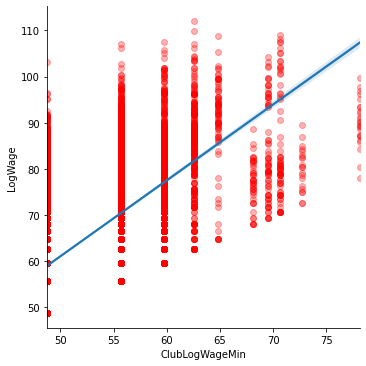

In [54]:
fig = plt.figure(figsize=(20,5))

sns.lmplot(data=df, x='ClubLogWageMin', y='LogWage', order=1,\
           scatter_kws={'alpha':0.3, 'color':'r'} )

<Figure size 1440x1440 with 0 Axes>

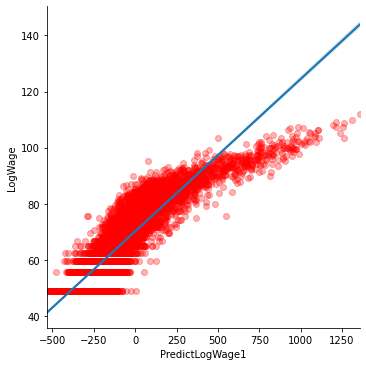

In [55]:
fig = plt.figure(figsize=(20,20))

sns.lmplot(data=df, x='PredictLogWage1', y='LogWage', order=1,\
           scatter_kws={'alpha':0.3, 'color':'r'} )

In [56]:
df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,PreferredFoot,InternationalReputation,WeakFoot,RealFace,Position,Joined,LoanedFrom,ContractValidUntil,Reactions,Composure,ReleaseClause,LogValue,Foot,PositionClass2,PositionClass,LogWage,ClubWageMean,ClubLogWageMean,ClubWageMedian,ClubLogWageMedian,ClubWageMin,ClubLogWageMin,AgeWeight,InternationalReputationWeight,RealFaceWeight,PositionClassWeight,LoanedFromWeight,Total,ClubWeight100,ClubWeight75,ClubWeight50,ClubWeight25,PredictLogWage,PredictLogWage1
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,14365000.0,73450,2202,Left,5.0,4.0,1,RF,"Jul 1, 2004",0,2021,95.0,96.0,29445000.0,16.480305,5.5,RF,Foward,112.043738,19054.848485,98.551293,16250.0,96.959097,520.0,62.557500,1.3750,1.8136,1.3738,1.1273,1.0,85.582275,2.298240,2.090291,1.988824,1.622995,1359,1357
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,10010000.0,52650,2228,Right,5.0,4.0,1,ST,"Jul 10, 2018",0,2022,96.0,95.0,16523000.0,16.119095,4.0,CF,Foward,108.714405,17118.400000,97.479676,16250.0,96.959097,650.0,64.785096,1.3333,1.8136,1.3738,1.1273,1.0,85.742584,2.229949,2.039457,1.988824,1.923713,1265,1260
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,15405000.0,37700,2143,Right,5.0,5.0,1,LW,"Aug 3, 2017",0,2022,94.0,94.0,29653000.0,16.550203,5.0,LF,Foward,105.374419,9364.333333,91.447702,8450.0,90.420401,650.0,64.785096,1.2917,1.8136,1.3738,1.1273,1.0,84.116442,2.161439,1.923146,1.854484,1.576048,1098,1086
3,193080,De Gea,27,Spain,91,93,Manchester United,9360000.0,33800,1471,Right,4.0,3.0,1,GK,"Jul 1, 2011",0,2020,90.0,68.0,18018000.0,16.051956,3.0,GK,GoalKeeper,104.282457,13358.484848,94.999819,14300.0,95.680847,1040.0,69.479371,1.3333,1.6780,1.3738,1.0000,1.0,75.483580,2.139041,2.012069,1.962605,1.749938,1027,950
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,13260000.0,46150,2281,Right,4.0,5.0,1,RCM,"Aug 30, 2015",0,2023,91.0,88.0,25532000.0,16.400263,5.0,RM,Medfielder,107.396739,14737.272727,95.982030,15600.0,96.550903,390.0,59.687076,1.3333,1.6780,1.3738,1.0727,1.0,80.731667,2.202921,2.057838,1.980451,1.650376,1023,986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17902,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,7800.0,130,1307,Right,1.0,2.0,0,CM,"May 3, 2017",0,2019,49.0,45.0,18590.0,8.962007,2.0,CM,Medfielder,48.751973,297.142857,56.975728,260.0,55.645204,130.0,48.751973,1.0000,1.0000,1.0000,1.0727,1.0,37.683999,1.328871,1.224301,1.141394,1.106045,90,-322
17903,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,7800.0,130,1098,Right,1.0,2.0,0,ST,"Mar 19, 2018",0,2020,40.0,42.0,14690.0,8.962007,2.0,CF,Foward,48.751973,130.000000,48.751973,130.0,48.751973,130.0,48.751973,1.0000,1.0000,1.0000,1.1273,1.0,32.031847,1.000000,1.000000,1.000000,1.000000,48,-471
17904,241638,B. Worman,16,England,47,67,Cambridge United,7800.0,130,1189,Right,1.0,3.0,0,ST,"Jul 1, 2017",0,2021,47.0,41.0,21450.0,8.962007,3.0,CF,Foward,48.751973,250.370370,55.269274,260.0,55.645204,130.0,48.751973,1.0000,1.0000,1.0000,1.1273,1.0,36.777779,1.283179,1.141394,1.141394,1.000000,84,-438
17905,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,7800.0,130,1228,Right,1.0,3.0,0,RW,"Apr 24, 2018",0,2019,21.0,46.0,18590.0,8.962007,3.0,RF,Foward,48.751973,255.185185,55.459006,260.0,55.645204,130.0,48.751973,1.0000,1.0000,1.0000,1.1273,1.0,26.509253,1.328871,1.141394,1.141394,1.000000,90,-510


In [57]:
df.to_pickle('./dataset/나혼자FIFA_이적예상WAGE.pkl')

In [58]:
끝

NameError: name '끝' is not defined